In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Open the raw data

In [2]:
height_map_values = open('height_map_data.txt').read()

In [3]:
each_point_height_values = height_map_values.split('\n7\n')

In [4]:
height_map = [[float(x.split(',')[1][4:]) for x in point.split('\n') if len(x)> 3] for point in each_point_height_values]
height_map = np.array(height_map)

In [5]:
useful_values_height_map = height_map[:, 2:]

This is the height at each point

In [6]:
average_height_at_each_point = np.average(useful_values_height_map, 1)

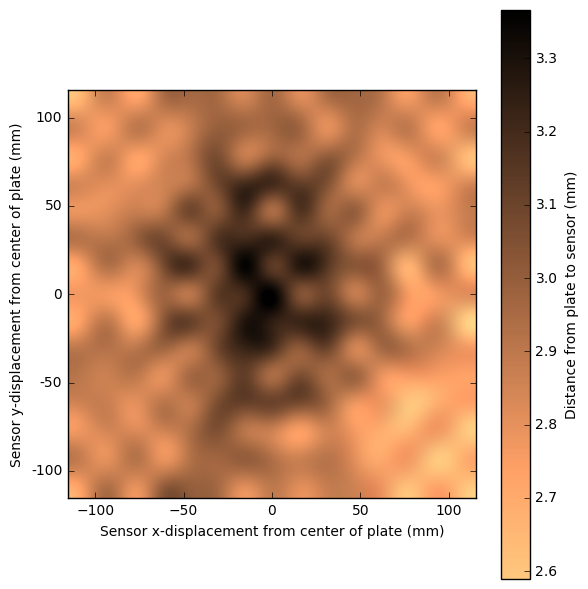

In [33]:
height_in_mm = average_height_at_each_point.reshape(
    15,15)/95.6/7.4+12.5/7.4
mm_per_gridpoint = 16.485
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(
    height_in_mm,
    cmap='copper_r',
    interpolation='lanczos',
    extent=tuple(np.array([-7, 7, -7, 7])*mm_per_gridpoint))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.f'))
ax.set_xlabel("Sensor x-displacement from center of plate (mm)")
ax.set_ylabel("Sensor y-displacement from center of plate (mm)")
fig.colorbar(im, label='Distance from plate to sensor (mm)')
plt.tight_layout()
plt.savefig('height_map.pdf')

# Now we take an angular average:

In [8]:
grid_points = np.array([[x, y] for x in range(15) for y in range(15)])
radius_equation = lambda x_y: np.sqrt(x_y[0]**2. + x_y[1]**2.)
radii = np.array([radius_equation((grid_points - np.array([7, 7]))[i])
         for i in range(grid_points.size//2)])
radius_height = average_height_at_each_point

The height vs the radius:

In [9]:
height_radius = np.dstack(
    (height_in_mm[grid_points[:,0], grid_points[:, 1]],
    radii))[0]

In [10]:
unique_radii = np.unique(height_radius[:, 1])
average_heights = np.zeros(unique_radii.size)
std_average_heights = np.zeros(unique_radii.size)
for i in range(unique_radii.size):
    indices_to_average = np.argwhere(
        height_radius[:, 1]==unique_radii[i])
    average_heights[i] = np.average(
        height_radius[indices_to_average, 0])
    std_average_heights[i] = np.std(
        height_radius[indices_to_average, 0])
std_average_heights[0] = 0.01

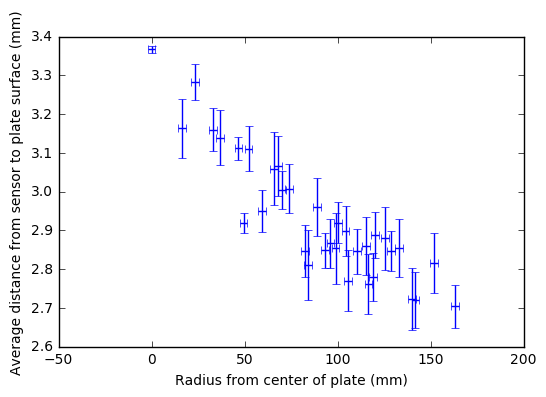

In [11]:
mm_per_gridpoint = 16.485
plt.errorbar(
    unique_radii*mm_per_gridpoint, average_heights, yerr=std_average_heights,
    fmt='none', xerr=7./6000.*107.*16.5)
plt.xlabel("Radius from center of plate (mm)")
plt.ylabel("Average distance from sensor to plate surface (mm)")

In [12]:
plt.errorbar?

In [13]:
import spinmob as s

In [14]:
my_fitter = s.data.fitter(f='a*x+b', p='a=-30, b=3.3')

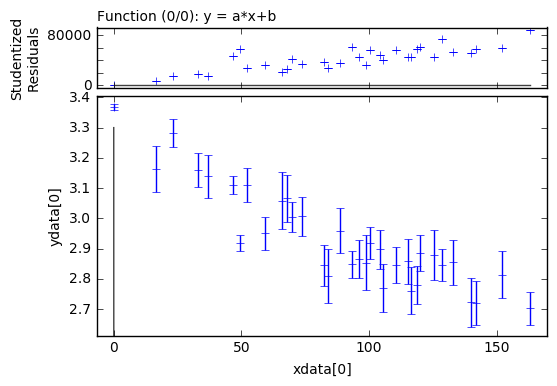

In [15]:
my_fitter.set_data(
    xdata=unique_radii*mm_per_gridpoint,
    ydata=average_heights,
    eydata=std_average_heights)

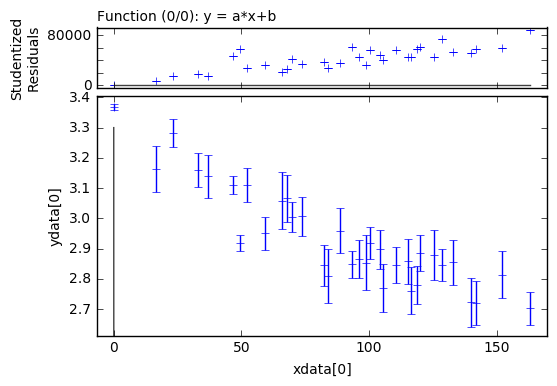

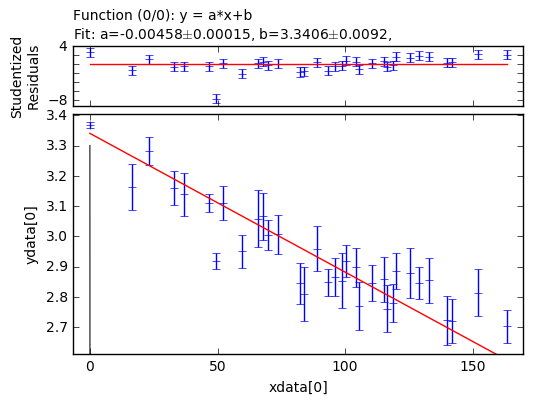


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_bg         [True]
  plot_ey         [True]
  plot_fit        [True]
  plot_guess      [True]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          [False]
  style_bg        [{'color': 'k', 'marker': '', 'ls': '-'}]
  style_data      [{'color': 'b', 'marker': '+', 'ls': ''}]
  style_fit       [{'color': 'r', 'marker': '', 'ls': '-'}]
  style_guess     [{'color': '0.25', 'marker': '', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [163.19317403004331]
  xmin            [0.0]
  xscale          ['linear']
  ylabel          [None]
  ymax            [3.3667618455275354]
  ymin            [2.7033479871084469]
  yscale          ['linear']

CONSTANTS

GUESS (reduced chi squared = [  2.26000000e+09])
  a          = -30.0
  b          = 3.3

FIT RESULTS (reduced chi squared = [ 3.3])
  a          = -0.00458 +/- 0.00015
  b          = 3.3406 +/-

In [16]:
my_fitter.fit()